In [16]:
from dotenv import load_dotenv
import os

load_dotenv()

HOST = os.getenv("HOST")
PORT = os.getenv("PORT")
DATABASE = os.getenv("DATABASE")
DB_USER = os.getenv("DB_USER")
PASSWORD = os.getenv("PASSWORD")


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2

sns.set_theme(style="whitegrid")

conn = psycopg2.connect(
    host=HOST,
    port=PORT,
    database=DATABASE,
    user=DB_USER,
    password=PASSWORD
)

movies = pd.read_sql("SELECT * FROM movies;", conn)
movies.head()

/var/folders/r4/7m3gpbm93dq76fwpq9lts6vh0000gn/T/ipykernel_95154/1911044000.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  movies = pd.read_sql("SELECT * FROM movies;", conn)


,tmdb_id,title,original_title,release_date,year,original_language,genres,budget,revenue_worldwide,runtime,popularity,vote_average,vote_count,production_companies,production_countries,director,top_3_cast,overview,adult
0,269149,Zootopia,Zootopia,2016-02-11,2016,en,"Animation, Adventure, Family, Comedy",150000000,1025521689,109,122.0547,7.755,17200,Walt Disney Animation Studios,United States of America,Byron Howard,"Ginnifer Goodwin, Jason Bateman, Idris Elba","Determined to prove herself, Officer Judy Hopp...",False
1,372058,Your Name.,君の名は。,2016-08-26,2016,ja,"Animation, Romance, Drama",0,358000000,106,26.7148,8.480,12136,"CoMix Wave Films, TOHO, KADOKAWA, jeki, AMUSE,...",Japan,Makoto Shinkai,"Ryunosuke Kamiki, Mone Kamishiraishi, Ryo Narita",High schoolers Mitsuha and Taki are complete s...,False
2,291805,Now You See Me 2,Now You See Me 2,2016-06-02,2016,en,"Thriller, Crime",120000000,334897606,129,14.5408,6.827,11211,"Summit Entertainment, K/O Paper Products, TIK ...","Hong Kong, United States of America",Jon M. Chu,"Jesse Eisenberg, Mark Ruffalo, Woody Harrelson",One year after outwitting the FBI and winning ...,False
3,271110,Captain America: Civil War,Captain America: Civil War,2016-04-27,2016,en,"Adventure, Action, Science Fiction",250000000,1155046416,147,12.2320,7.448,23541,Marvel Studios,United States of America,Joe Russo,"Chris Evans, Robert Downey Jr., Scarlett Johan...","Following the events of Age of Ultron, the col...",False
4,296096,Me Before You,Me Before You,2016-06-01,2016,en,"Drama, Romance",20000000,207945075,110,13.7781,7.926,12901,"New Line Cinema, Sunswept Entertainment, Metro...",United States of America,Thea Sharrock,"Emilia Clarke, Sam Claflin, Janet McTeer",A small town girl is caught between dead-end j...,False


In [18]:
movies = movies.copy()
movies = movies[movies["budget"] > 0]

movies["roi"] = movies["revenue_worldwide"] / movies["budget"]
movies[["title", "budget", "revenue_worldwide", "roi"]].head()

,title,budget,revenue_worldwide,roi
0,Zootopia,150000000,1025521689,6.836811
2,Now You See Me 2,120000000,334897606,2.790813
3,Captain America: Civil War,250000000,1155046416,4.620186
4,Me Before You,20000000,207945075,10.397254
6,Train to Busan,8500000,87547518,10.299708


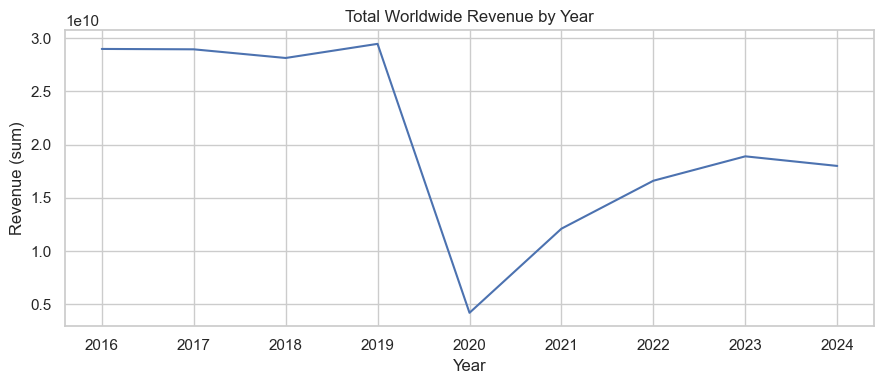

In [24]:
rev_year = (
    movies.groupby("year")["revenue_worldwide"]
    .sum()
    .sort_index()
)

plt.figure(figsize=(9,4))
rev_year.plot(kind="line")
plt.title("Total Worldwide Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Revenue (sum)")
plt.tight_layout()
plt.show()

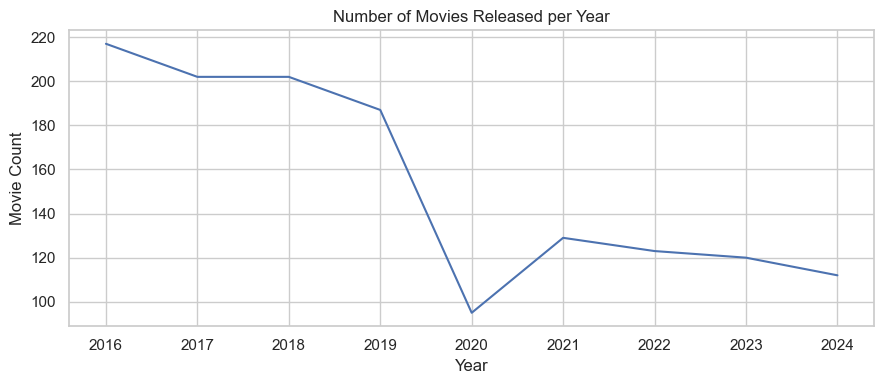

In [20]:
count_year = movies.groupby("year")["tmdb_id"].count()

plt.figure(figsize=(9,4))
count_year.plot(kind="line")
plt.title("Number of Movies Released per Year")
plt.xlabel("Year")
plt.ylabel("Movie Count")
plt.tight_layout()
plt.show()

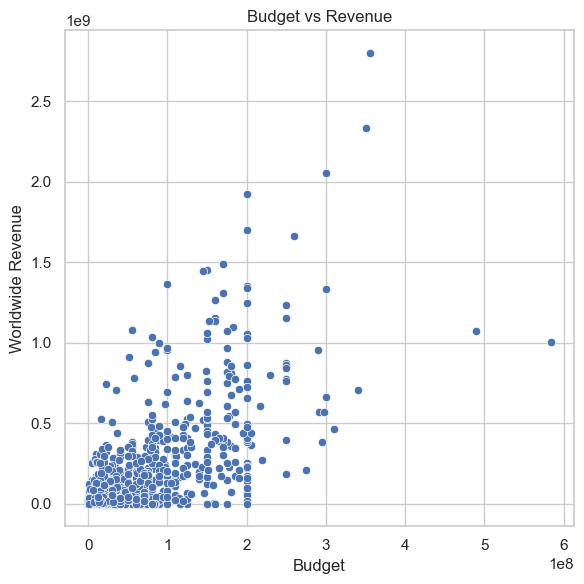

In [21]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=movies, x="budget", y="revenue_worldwide")
plt.title("Budget vs Revenue")
plt.xlabel("Budget")
plt.ylabel("Worldwide Revenue")
plt.tight_layout()
plt.show()

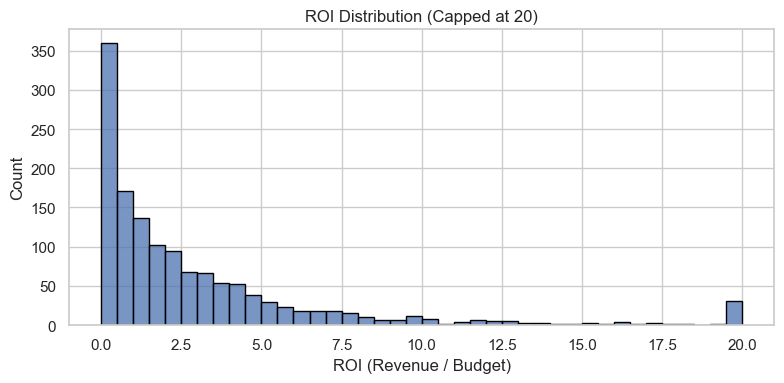

In [22]:
roi_clipped = movies["roi"].clip(upper=20)

plt.figure(figsize=(8,4))
sns.histplot(roi_clipped, bins=40, edgecolor="black")
plt.title("ROI Distribution (Capped at 20)")
plt.xlabel("ROI (Revenue / Budget)")
plt.tight_layout()
plt.show()

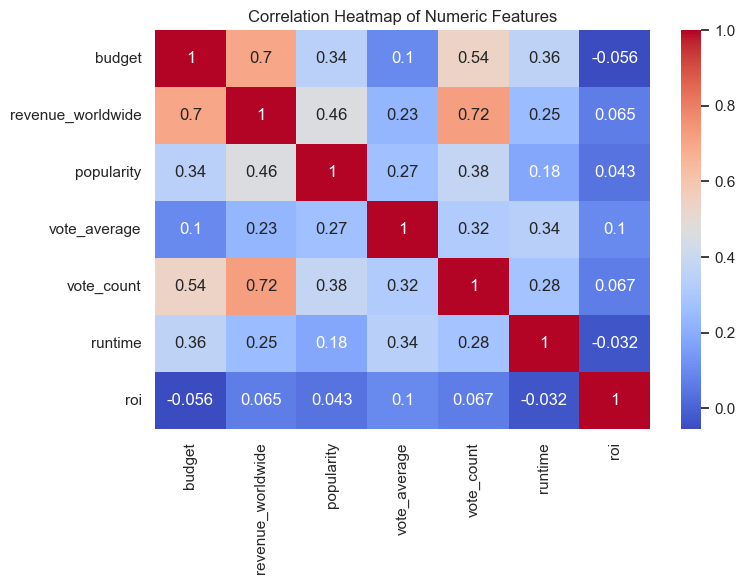

In [23]:
numeric = movies[["budget", "revenue_worldwide", "popularity", "vote_average", "vote_count", "runtime", "roi"]]

plt.figure(figsize=(8,6))
sns.heatmap(numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()